In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings 
warnings.filterwarnings("ignore")

Cargamos las bases para su análisis

In [101]:
coursera = pd.read_csv('Coursera_courses.csv')
coursera_review = pd.read_csv('Coursera_reviews.csv')
udemy = pd.read_csv('udemy_courses.csv')
edx = pd.read_csv('edx_courses.csv')
cursera_1=pd.read_csv('coursea_data.csv')

Realizamos la union de las bases de Coursera y reorganizamos las columnas

In [102]:
coursera = coursera.merge(coursera_review, on = 'course_id')
coursera = coursera[['course_id','name','institution','reviewers','reviews','date_reviews','rating','course_url']]

Borramos duplicados, cambiamos el tipo de datos para la fecha y renombramos las columnas para que las tres bases contengan la columna titulo

In [103]:
coursera['date_reviews'] = pd.to_datetime(coursera['date_reviews'])
coursera.rename(columns={'name':'title'}, inplace=True)
udemy.rename(columns={'course_title':'title'}, inplace=True)

In [104]:
coursera = coursera.drop_duplicates()
edx = edx.drop_duplicates()
udemy = udemy.drop_duplicates()

Realizamos el WordCloud para el título de las tres plataformas

In [139]:
font_path = 'SimHei.ttf'

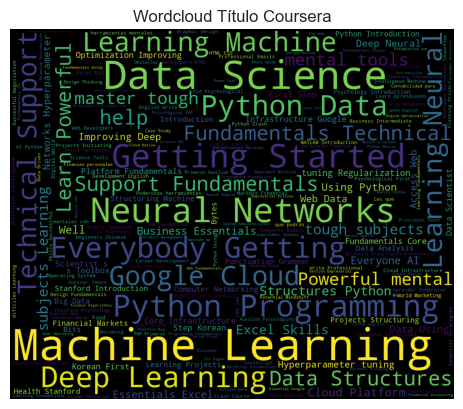

In [140]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=1200,height=1000).generate(" ".join(coursera['title']))
plt.imshow(wordcloud)
plt.title('Wordcloud Título Coursera')
plt.axis('off')
plt.show()

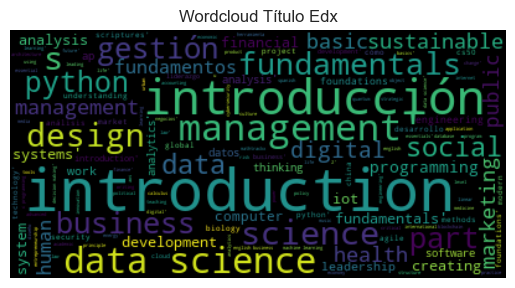

In [142]:
stop = stopwords.words('english')
edx['title'] = edx['title'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
stop = stopwords.words('spanish')
edx['title'] = edx['title'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
text = edx['title'].values 
wordcloud_1 = WordCloud().generate(str(text))
plt.imshow(wordcloud_1,interpolation='bilinear')
plt.title('Wordcloud Título Edx')
plt.axis("off")
plt.show()

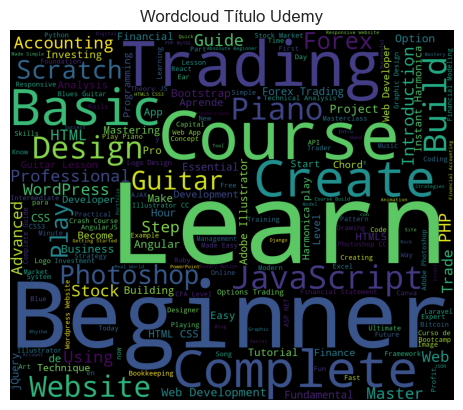

In [143]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=1200,height=1000).generate(" ".join(udemy['title']))
plt.imshow(wordcloud)
plt.title('Wordcloud Título Udemy')
plt.axis('off')
plt.show()

## `Exploración de Datos Coursera`


Text(0, 0.5, 'Cantidad de opiniones')

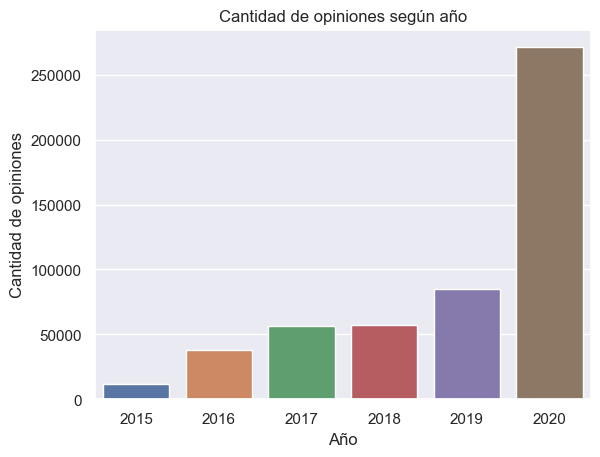

In [144]:
sns.countplot(x = coursera['date_reviews'].dt.year)
plt.title('Cantidad de opiniones según año')
plt.xlabel('Año')
plt.ylabel('Cantidad de opiniones')

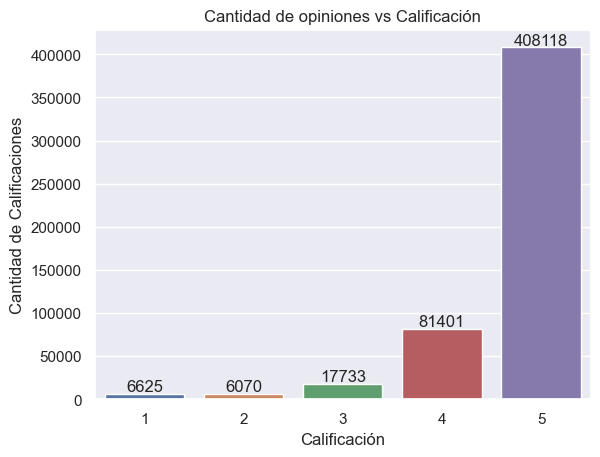

In [145]:
ax = sns.countplot(x = coursera['rating'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.title('Cantidad de opiniones vs Calificación')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Calificaciones')
plt.show()

In [146]:
coursera['institution'].value_counts().head(5)

University of Michigan        57199
DeepLearning.AI               40329
Google                        26938
University of Pennsylvania    25763
IBM                           24975
Name: institution, dtype: int64

In [147]:
top5 = coursera.loc[(coursera['institution'] == 'University of Michigan')
              | (coursera['institution'] == 'DeepLearning.AI')
              | (coursera['institution'] == 'Google')
              | (coursera['institution'] == 'IBM')
              | (coursera['institution'] == 'University of Pennsylvania')]

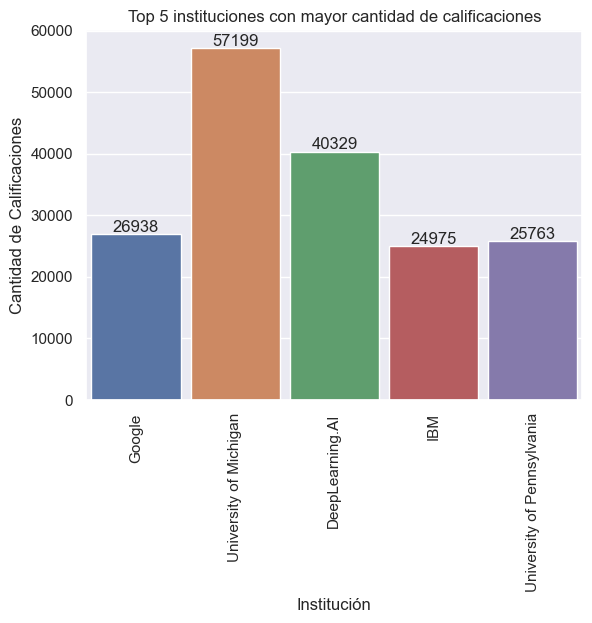

In [148]:
ax = sns.countplot(x = top5['institution'], width= 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 instituciones con mayor cantidad de calificaciones')
plt.xlabel('Institución')
plt.ylabel('Cantidad de Calificaciones')
plt.show()

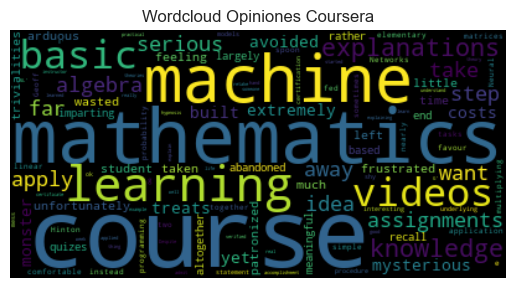

In [149]:
text = coursera['reviews'].values 
wordcloud_1 = WordCloud().generate(str(text))
plt.imshow(wordcloud_1,interpolation='bilinear')
plt.title('Wordcloud Opiniones Coursera')
plt.axis("off")
plt.show()

In [150]:
coursera['rating'].describe()

count   519947.00
mean         4.69
std          0.71
min          1.00
25%          5.00
50%          5.00
75%          5.00
max          5.00
Name: rating, dtype: float64

## `Exploración de Datos EDX`


In [151]:
edx['institution'].value_counts()

Harvard University                                                    103
Universitat Politècnica de Valencia                                    47
Massachusetts Institute of Technology                                  41
Delft University of Technology                                         30
IBM                                                                    30
                                                                     ... 
The University of Tokyo                                                 1
Educational Testing Service                                             1
The National University of Singapore                                    1
University of Oxford                                                    1
University of Maryland Global Campus-University System of Maryland      1
Name: institution, Length: 111, dtype: int64

In [152]:
top5_edx = edx.loc[(edx['institution'] == 'Harvard University')
              | (edx['institution'] == 'Universitat Politècnica de Valencia')
              | (edx['institution'] == 'Massachusetts Institute of Technology')
              | (edx['institution'] == 'Delft University of Technology')
              | (edx['institution'] == 'IBM')]

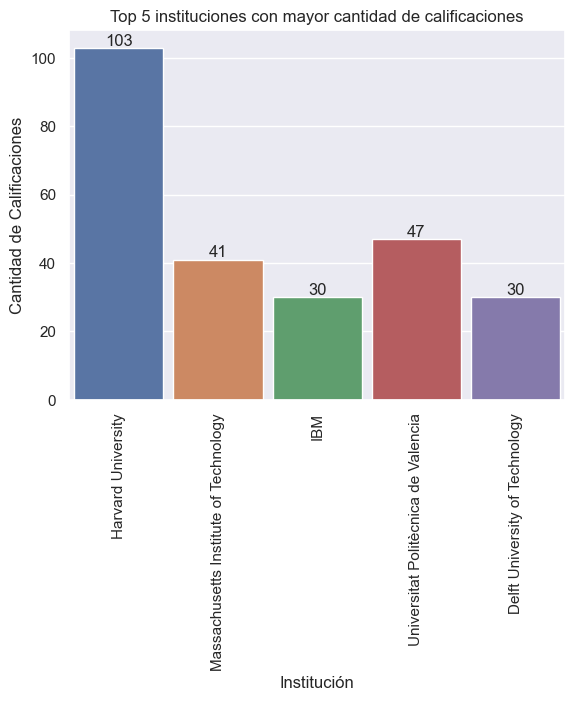

In [153]:
ax = sns.countplot(x = top5_edx['institution'], width= 0.9)
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 instituciones con mayor cantidad de calificaciones')
plt.xlabel('Institución')
plt.ylabel('Cantidad de Calificaciones')
plt.show()

In [154]:
list = []
for i in edx['n_enrolled']:
    i = (str(i).replace(',',''))
    list.append(i)

edx['n_enrolled'] = list
edx['n_enrolled'] = pd.to_numeric(edx['n_enrolled'], errors='ignore')
edx['n_enrolled'] = edx['n_enrolled'].astype('float',errors='ignore')


In [155]:
pd.set_option('display.float_format', '{:.2f}'.format)
edx['n_enrolled'].describe()

count       854.00
mean      53208.79
std      119091.06
min        5001.00
25%       11764.25
50%       24119.00
75%       54652.50
max     2442271.00
Name: n_enrolled, dtype: float64

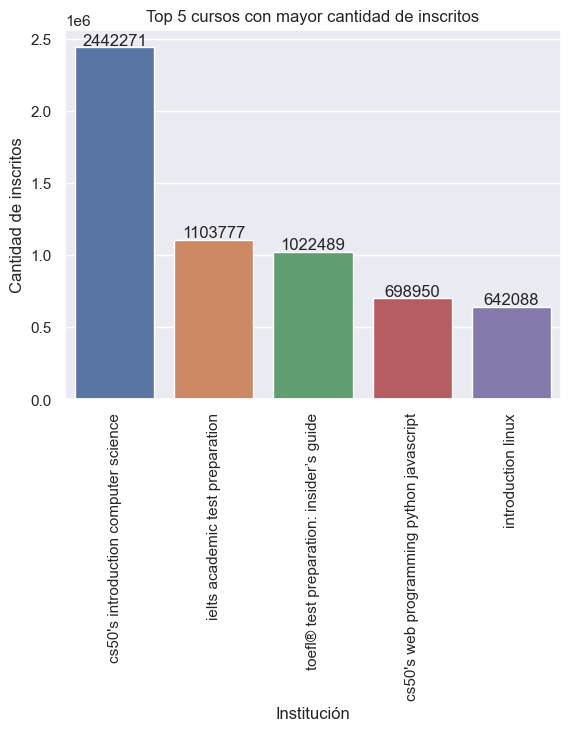

In [156]:
top_5_n_rolled = edx.loc[:, ['title','n_enrolled']].sort_values(['n_enrolled'], ascending=False).head(5)
ax = sns.barplot(x = top_5_n_rolled['title'], y = top_5_n_rolled['n_enrolled'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 cursos con mayor cantidad de inscritos')
plt.xlabel('Institución')
plt.ylabel('Cantidad de inscritos')
plt.show()

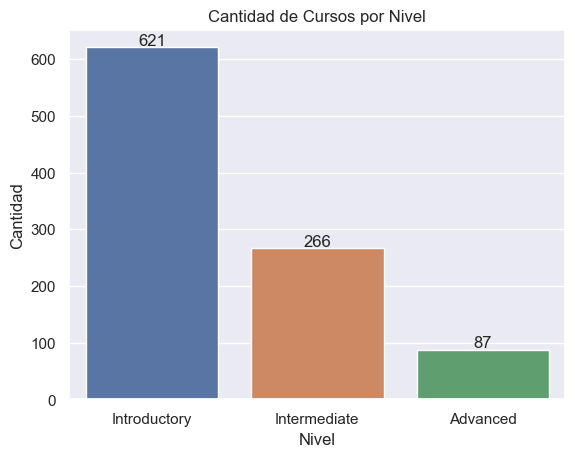

In [157]:
ax = sns.countplot(x = edx['Level'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.title('Cantidad de Cursos por Nivel')
plt.show()

In [158]:
edx['language'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [162]:
top3_edx_lang = edx.loc[(edx['language'] == 'English')
              | (edx['language'] == 'Español')
              | (edx['language'] == 'Français')]

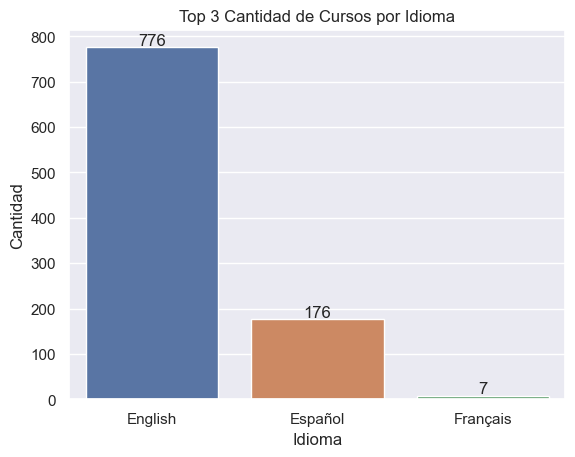

In [166]:
ax = sns.countplot(x = top3_edx_lang['language'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.title('Top 3 Cantidad de Cursos por Idioma')
plt.show()

In [170]:
edx['course_effort'].value_counts().head(5)

2–4 hours per week    108
2–3 hours per week    104
3–5 hours per week    103
3–4 hours per week     91
4–6 hours per week     79
Name: course_effort, dtype: int64

In [172]:
edx['course_length'].value_counts()

4 Weeks     194
6 Weeks     187
5 Weeks     148
7 Weeks      92
8 Weeks      84
10 Weeks     82
12 Weeks     36
3 Weeks      35
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      7
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

In [174]:
edx['price'] = edx['price'].str.extract('(\d+)')
edx['price'] = pd.to_numeric(edx['price'], errors='ignore')
edx['price'] = edx['price'].astype('float',errors='ignore')

In [226]:
edx['price'].describe()

count   974.00
mean    100.46
std      69.60
min       5.00
25%      49.00
50%      79.00
75%     149.00
max     450.00
Name: price, dtype: float64

In [181]:
edx['course_length'] = edx['course_length'].str.extract('(\d+)')
edx['course_length'] = pd.to_numeric(edx['course_length'], errors='ignore')
edx['course_length'] = edx['course_length'].astype('float',errors='ignore')

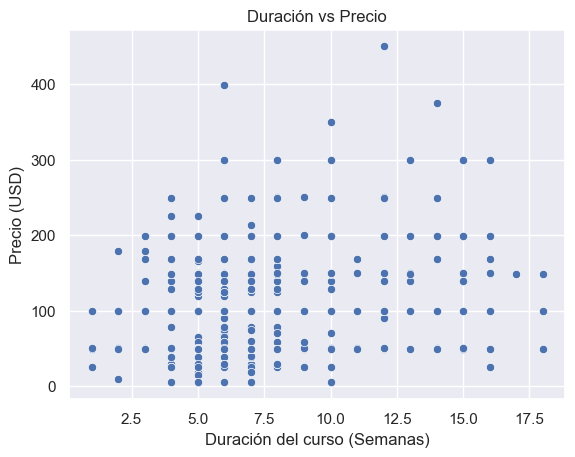

In [183]:
sns.scatterplot(x = edx['course_length'], y=edx['price'])
plt.xlabel('Duración del curso (Semanas)')
plt.ylabel('Precio (USD)')
plt.title('Duración vs Precio')
plt.show()

Analizamos las correlaciones entre las variables inscritos, logitud del curso y precio.

In [196]:
correlation_matrix = edx.corr()
correlation_matrix

,n_enrolled,course_length,price
n_enrolled,1.00,0.16,0.05
course_length,0.16,1.00,0.15
price,0.05,0.15,1.00


In [217]:
edx.loc[:, ['title', 'price','n_enrolled']].sort_values('n_enrolled', ascending= False).head(10)


,title,price,n_enrolled
2,cs50's introduction computer science,90.00,2442271.00
29,ielts academic test preparation,99.00,1103777.00
31,toefl® test preparation: insider’s guide,49.00,1022489.00
23,cs50's web programming python javascript,90.00,698950.00
64,introduction linux,199.00,642088.00
16,data science: r basics,49.00,528782.00
48,science happiness,169.00,475614.00
24,contract law: trust promise contract,125.00,414181.00
30,architectural imagination,99.00,406181.00
35,basic spanish 1: getting started,40.00,400169.00


In [213]:
edx['% n_enrolled'] = edx['n_enrolled'] / (edx['n_enrolled'].sum()) * 100

In [215]:
edx.loc[:, ['title', 'price','n_enrolled', '% n_enrolled']].sort_values('% n_enrolled', ascending= False)

,title,price,n_enrolled,% n_enrolled
2,cs50's introduction computer science,90.00,2442271.00,5.37
29,ielts academic test preparation,99.00,1103777.00,2.43
31,toefl® test preparation: insider’s guide,49.00,1022489.00,2.25
23,cs50's web programming python javascript,90.00,698950.00,1.54
64,introduction linux,199.00,642088.00,1.41
...,...,...,...,...
967,drones autonomous systems 2: applications emer...,149.00,NaN,NaN
968,mathtrackx: differential calculus,79.00,NaN,NaN
970,leaders citizen security justice management ca...,25.00,NaN,NaN
971,pattern studying making | 图案审美与创作,139.00,NaN,NaN


In [218]:
edx['profit'] = edx['price'] * edx ['n_enrolled']

In [222]:
edx.loc[:, ['title', 'price','n_enrolled', '% n_enrolled', 'profit']].sort_values('profit', ascending= False).head(5)

,title,price,n_enrolled,% n_enrolled,profit
2,cs50's introduction computer science,90.00,2442271.00,5.37,219804390.00
64,introduction linux,199.00,642088.00,1.41,127775512.00
29,ielts academic test preparation,99.00,1103777.00,2.43,109273923.00
134,python data science,350.00,266978.00,0.59,93442300.00
48,science happiness,169.00,475614.00,1.05,80378766.00


In [224]:
edx.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,% n_enrolled,profit
0,learn online,Learn essential strategies for successful onli...,124980.00,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2.00,49.00,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,0.28,6124020.00
1,programming everybody (getting started python),"This course is a ""no prerequisite"" introductio...",293864.00,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7.00,49.00,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,0.65,14399336.00
2,cs50's introduction computer science,An introduction to the intellectual enterprise...,2442271.00,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12.00,90.00,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,5.37,219804390.00


## `Exploración de Datos Udemy`


In [230]:
udemy['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

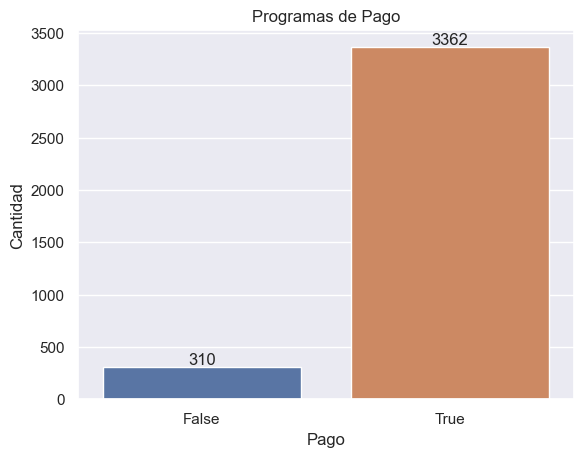

In [233]:
ax = sns.countplot(x = udemy['is_paid'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')
plt.xlabel('Pago')
plt.ylabel('Cantidad')
plt.title('Programas de Pago')
plt.show()

In [234]:
udemy['price'].describe()

count   3672.00
mean      66.10
std       61.04
min        0.00
25%       20.00
50%       45.00
75%       95.00
max      200.00
Name: price, dtype: float64

In [241]:
udemy = udemy.rename(columns={'num_subscribers': 'n_enrolled'})

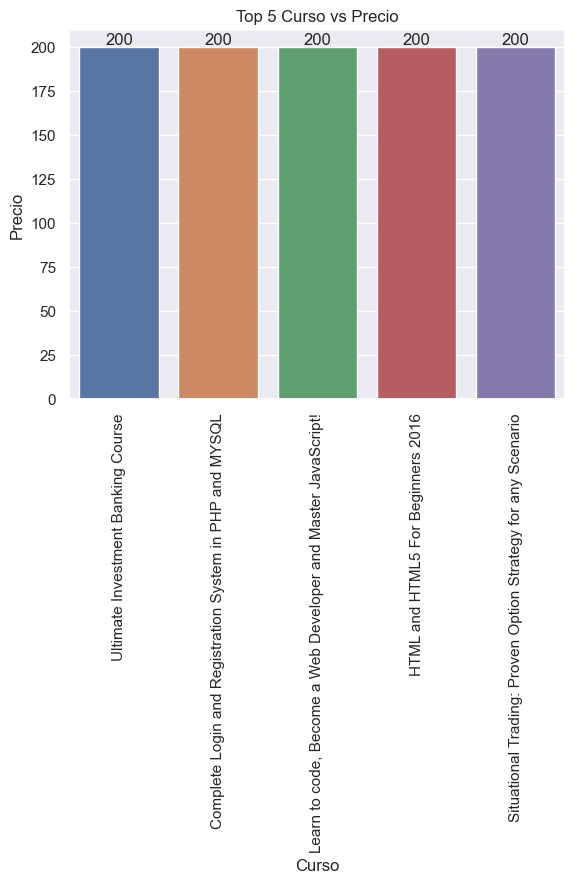

In [247]:
top_5_price_rolled = udemy.loc[:, ['title','price']].sort_values(['price'], ascending=False).head(5)
ax = sns.barplot(x = top_5_price_rolled['title'], y = top_5_price_rolled['price'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 Curso vs Precio')
plt.xlabel('Curso')
plt.ylabel('Precio')
plt.show()

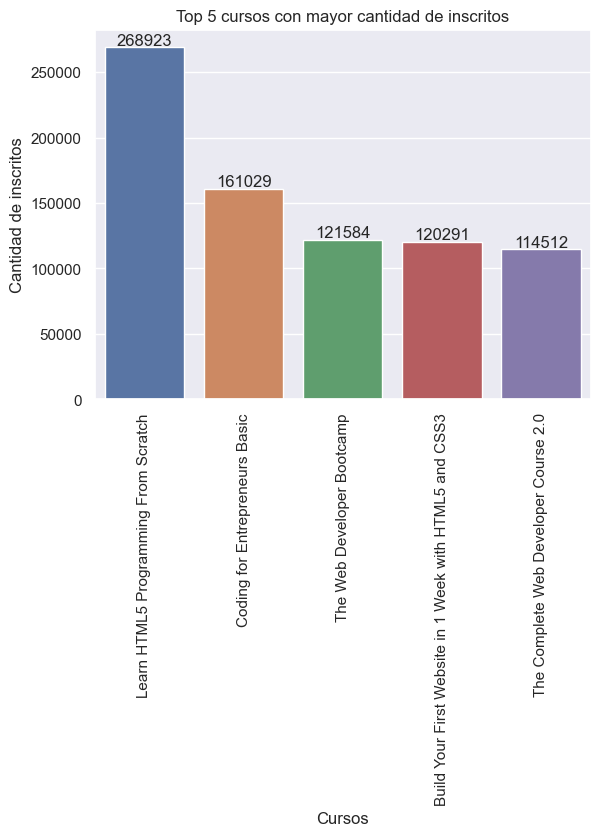

In [246]:
top_5_price_rolled = udemy.loc[:, ['title','n_enrolled']].sort_values(['n_enrolled'], ascending=False).head(5)
ax = sns.barplot(x = top_5_price_rolled['title'], y = top_5_price_rolled['n_enrolled'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 cursos con mayor cantidad de inscritos')
plt.xlabel('Cursos')
plt.ylabel('Cantidad de inscritos')
plt.show()

In [248]:
udemy['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

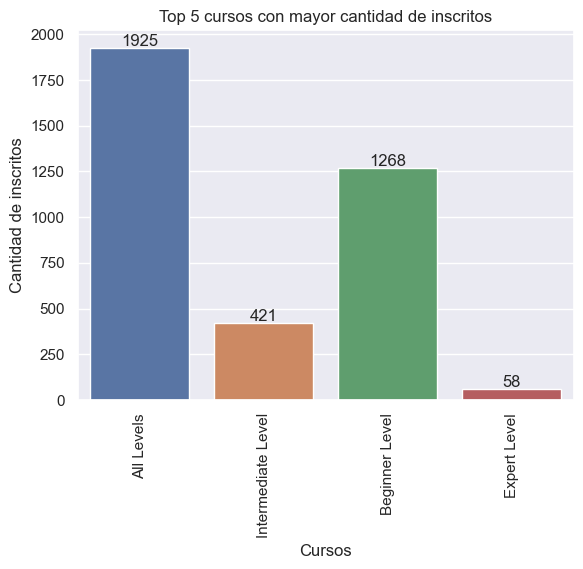

In [249]:
ax = sns.countplot(x = udemy['level'])
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2.,
                                               p.get_height()), ha='center',
                                               va='center', xytext = (0, 5),
                                               textcoords = 'offset points')

plt.xticks(rotation = 'vertical')
plt.title('Top 5 cursos con mayor cantidad de inscritos')
plt.xlabel('Cursos')
plt.ylabel('Cantidad de inscritos')
plt.show()

In [251]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'], errors= 'ignore') 

Text(0, 0.5, 'Cantidad de Cursos')

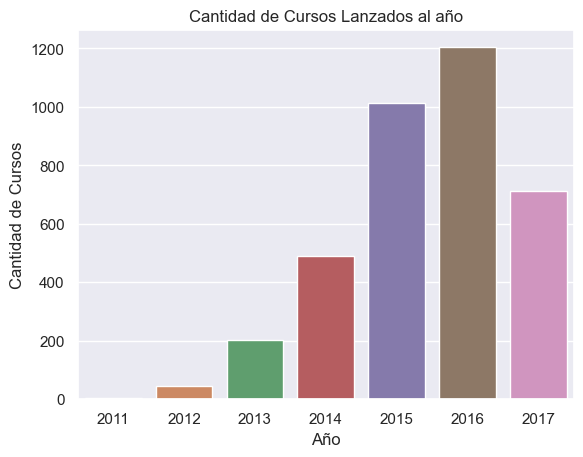

In [255]:
sns.countplot(x = udemy['published_timestamp'].dt.year)
plt.title('Cantidad de Cursos Lanzados al año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Cursos')

Text(0, 0.5, 'Cantidad de Cursos')

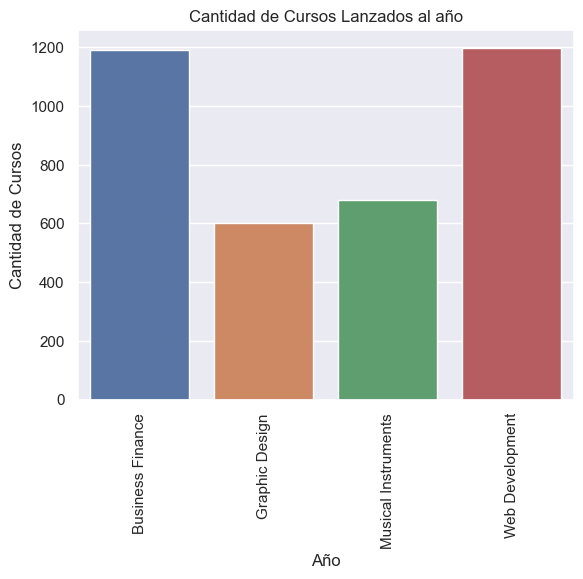

In [259]:
sns.countplot(x = udemy['subject'])
plt.title('Cantidad de Cursos Lanzados al año')
plt.xticks(rotation = 'vertical')
plt.xlabel('Año')
plt.ylabel('Cantidad de Cursos')

In [285]:
udemy

,course_id,title,url,is_paid,price,n_enrolled,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.50,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.00,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.50,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.00,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.00,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.00,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.50,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.50,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.00,2016-08-11 19:06:15+00:00,Web Development


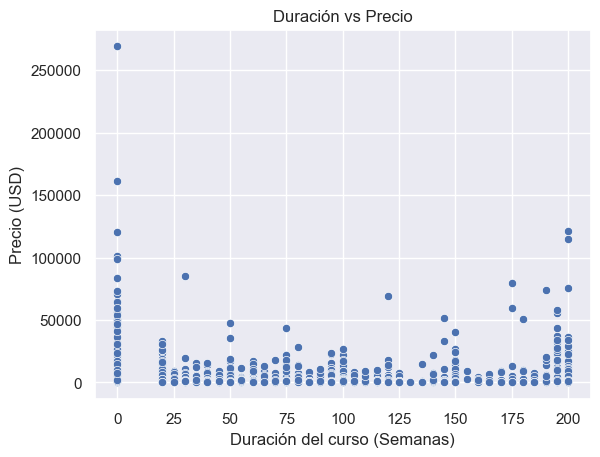

In [286]:
sns.scatterplot(x = udemy['price'], y=udemy['n_enrolled'])
plt.xlabel('Duración del curso (Semanas)')
plt.ylabel('Precio (USD)')
plt.title('Duración vs Precio')
plt.show()

In [287]:
correlation_matrix_U = udemy.corr()
correlation_matrix_U

,course_id,is_paid,price,n_enrolled,num_reviews,num_lectures,content_duration
course_id,1.00,-0.01,0.14,-0.17,-0.06,-0.02,-0.06
is_paid,-0.01,1.00,0.33,-0.27,-0.09,0.11,0.09
price,0.14,0.33,1.00,0.05,0.11,0.33,0.29
n_enrolled,-0.17,-0.27,0.05,1.00,0.65,0.16,0.16
num_reviews,-0.06,-0.09,0.11,0.65,1.00,0.24,0.23
num_lectures,-0.02,0.11,0.33,0.16,0.24,1.00,0.80
content_duration,-0.06,0.09,0.29,0.16,0.23,0.80,1.00


## `Formulación de KPI`

1. Tasa de conversión de inscritos gratuitos a pagados = número de inscritos con pago / número de inscritos gratuitos * 100

In [282]:
# Valor de KPI para el año 2016
n_paid =udemy.loc[(udemy['is_paid'] == True) & (udemy['published_timestamp'].dt.year == 2016), 'n_enrolled'].sum()
n_no_paid = udemy.loc[(udemy['is_paid'] == False) & (udemy['published_timestamp'].dt.year == 2016), 'n_enrolled'].sum()
Kpi_2016 = (n_paid / n_no_paid) * 100
# Valor de KPI para el año 2016
n_paid =udemy.loc[(udemy['is_paid'] == True) & (udemy['published_timestamp'].dt.year == 2017), 'n_enrolled'].sum()
n_no_paid = udemy.loc[(udemy['is_paid'] == False) & (udemy['published_timestamp'].dt.year == 2017), 'n_enrolled'].sum()
Kpi_2017 = (n_paid / n_no_paid) * 100


In [284]:
Variación = (Kpi_2017-Kpi_2016) / Kpi_2016 
result = "{:2%}".format(Variación)
print(result)

-7.259536%


In [288]:
#Exportar Bases
# coursera.to_csv('Coursera.csv')
# edx.to_csv('Edx.csv')
# udemy.to_csv('Udemy.csv')